In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition## for explainer
#from lime import lime_tabular

In [3]:
#load data
df = pd.read_csv("data.csv")
df.describe()

,S2Sn1.Blue,S2Sn1.Green,S2Sn1.Red,S2Sn1.RE1,S2Sn1.RE2,S2Sn1.RE3,S2Sn1.NIR,S2Sn1.NNIR,S2Sn1.SWIR3,S2Sn1.SWIR4,...,TINDVIAfterMax,TINDVIAsymmetry,S1Sn1.VV,S1Sn1.VH,S1Sn2.VV,S1Sn2.VH,S1Sn3.VV,S1Sn3.VH,S1Sn4.VV,S1Sn4.VH
count,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,...,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000
mean,289.723603,576.896732,634.148052,1090.309849,2118.583151,2521.410249,2655.548061,1708.051384,1063.637402,2735.601038,...,6.454816,-3.479622,0.043687,0.161811,0.052919,0.200191,0.044584,0.164430,0.044929,0.166350
std,244.149897,299.588630,425.777041,397.871392,611.865340,790.524314,865.905277,764.403644,638.794359,890.263051,...,3.650242,3.845764,0.034288,0.176712,0.042648,0.192173,0.038367,0.189987,0.035707,0.172977
min,1.000000,130.000000,112.500000,174.000000,133.500000,178.000000,137.000000,111.000000,81.500000,143.500000,...,-6.054865,-13.655028,0.004847,0.008212,0.004861,0.008862,0.004763,0.007820,0.004794,0.009569
25%,144.000000,382.625000,317.500000,778.500000,1834.000000,2176.500000,2281.000000,1273.000000,622.000000,2405.000000,...,4.267315,-5.975927,0.024519,0.084441,0.032068,0.119572,0.022002,0.081064,0.025609,0.088610
50%,212.000000,503.500000,500.000000,1041.500000,2115.250000,2510.000000,2653.000000,1639.250000,849.000000,2761.000000,...,6.602171,-2.891208,0.037353,0.130825,0.044374,0.167913,0.036800,0.128276,0.037843,0.133982
75%,355.375000,680.000000,833.375000,1323.000000,2442.625000,2909.000000,3117.375000,2179.000000,1497.000000,3203.000000,...,8.671381,-0.827103,0.054738,0.195183,0.063089,0.235514,0.058484,0.198222,0.055507,0.199081
max,2997.000000,3218.000000,3320.000000,2898.000000,4262.000000,5126.000000,5569.000000,5516.500000,4683.500000,5500.000000,...,14.638000,9.031157,0.780539,7.586621,0.852460,6.111767,0.924117,6.738769,0.900095,6.814317


In [5]:
df.head(5)

,S2Sn1.Blue,S2Sn1.Green,S2Sn1.Red,S2Sn1.RE1,S2Sn1.RE2,S2Sn1.RE3,S2Sn1.NIR,S2Sn1.NNIR,S2Sn1.SWIR3,S2Sn1.SWIR4,...,TINDVIAsymmetry,S1Sn1.VV,S1Sn1.VH,S1Sn2.VV,S1Sn2.VH,S1Sn3.VV,S1Sn3.VH,S1Sn4.VV,S1Sn4.VH,Class
0,2892.0,2953.0,3320.0,2628.0,2993.0,3149.0,3586.0,3890.0,3924.0,3184.0,...,-0.370711,0.039430,1.239011,0.056008,0.620427,0.038737,0.292159,0.034488,0.454127,Built_area
1,2997.0,3218.0,3261.0,2628.0,2993.0,3149.0,3544.0,3890.0,3924.0,3184.0,...,1.144153,0.041160,1.634018,0.056521,0.960369,0.036981,0.299749,0.032929,0.470674,Built_area
2,1468.0,1866.5,2363.0,1991.5,2144.0,2189.5,2559.5,2641.5,2611.5,2201.0,...,-0.199264,0.043617,0.107153,0.074617,0.178752,0.047758,0.106462,0.039125,0.150803,Built_area
3,2436.0,2574.0,2653.0,2107.0,2562.0,2773.0,3099.0,3293.0,2923.0,2839.0,...,1.905906,0.042985,0.526712,0.056121,0.889728,0.036421,0.294085,0.033882,0.417073,Built_area
4,1921.0,2192.0,2327.5,2099.5,2293.5,2417.0,2737.5,3016.5,3052.5,2489.5,...,-0.439286,0.021763,0.115373,0.042416,0.449223,0.025203,0.125186,0.032452,0.125381,Built_area


In [6]:
#check dimensionm
df.shape

(10986, 72)

In [7]:
#drop null values
df = df.dropna()
df = df.reset_index(drop=True)

In [9]:
df.shape

(10986, 72)

In [ ]:
'''
for x in range(0, df.shape[1]-1, 1):
    print(df.columns[x])
    df1 = df.iloc[:, x]
    df1.hist()    
    plt.show()
    
    
    x = df.columns[x] 
    fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
    fig.suptitle(x, fontsize=20)### distribution
    ax[0].title.set_text('distribution')
    variable = df[x].fillna(df[x].mean())
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
    variable = variable[(variable > breaks[0]) & (variable < 
                        breaks[10])]

    sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
    des = df[x].describe()
    ax[0].axvline(des["25%"], ls='--')
    ax[0].axvline(des["mean"], ls='--')
    ax[0].axvline(des["75%"], ls='--')
    ax[0].grid(True)

    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))### boxplot 
    ax[1].title.set_text('outliers (log scale)')
    tmp_dtf = pd.DataFrame(df[x])
    tmp_dtf[x] = np.log(tmp_dtf[x])
    tmp_dtf.boxplot(column=x, ax=ax[1])
    plt.show()
    
    
    if(x==70):
        break
'''

In [10]:
count = 0
empty_array = []

for i in range(len(df['Class'].unique())): 
    df2 = df.loc[df['Class'] == df['Class'].unique()[i]] 
    print(df['Class'].unique()[i], " == ", df2.shape[0])
    #recs.append(df['Class'].unique()[i],df2.shape[0])
    empty_array.append(df2.shape[0])
    count = count + df2.shape[0]

print("Total", count, "which is equal/not to original", df.shape[0])
print(empty_array)

Built_area  ==  375
Grassland  ==  936
Mixedcrop_avocado  ==  191
Mixedcrop_maize  ==  299
Monocrop_avocado  ==  242
Monocrop_coffee  ==  1462
Monocrop_maize  ==  479
Monocrop_pineapple  ==  1451
Monocrop_tea  ==  406
Natural_vegetation  ==  3005
Shrubland  ==  743
Water  ==  1397
Total 10986 which is equal/not to original 10986
[375, 936, 191, 299, 242, 1462, 479, 1451, 406, 3005, 743, 1397]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Built_area'),
  Text(1, 0, 'Grassland'),
  Text(2, 0, 'Mixedcrop_avocado'),
  Text(3, 0, 'Mixedcrop_maize'),
  Text(4, 0, 'Monocrop_avocado'),
  Text(5, 0, 'Monocrop_coffee'),
  Text(6, 0, 'Monocrop_maize'),
  Text(7, 0, 'Monocrop_pineapple'),
  Text(8, 0, 'Monocrop_tea'),
  Text(9, 0, 'Natural_vegetation'),
  Text(10, 0, 'Shrubland'),
  Text(11, 0, 'Water')])

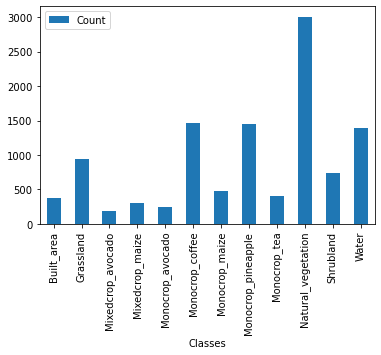

In [29]:
pdf = pd.DataFrame({'Classes':df['Class'].unique(), 'Count': empty_array})
ax = pdf.plot.bar(x='Classes', y='Count', rot=0)
plt.xticks(rotation=90)

## Preprocess the dataset

Divide the dataset into class and target variable

In [12]:
X = df.iloc[:, 0:df.shape[1]-1].values
y = df.iloc[:, df.shape[1]-1:df.shape[1]].values

Preprocess the dataset and divide into train and test

In [13]:
X.shape

(10986, 71)

In [14]:
y.shape

(10986, 1)

In [ ]:
y[10000]

In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\ksenagi\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
X_train.shape

(8788, 71)

In [17]:
X_train[1]

array([-0.35522255, -0.56378782, -0.47009853,  0.1173552 ,  1.24611005,
        1.37458037,  1.40836126, -1.00874255, -0.72739927,  1.24058752,
       -0.4878312 , -0.84127024, -0.78419933, -0.27015137,  1.58489128,
        1.7369459 ,  1.61433269, -1.25670361, -1.05038193,  1.36033396,
       -0.73312983, -0.94582407, -0.80091428, -0.56593729,  1.38194495,
        2.20875108,  2.03791238, -1.11363244, -0.97335631,  1.75089848,
       -0.67359258, -0.667638  , -0.58926207, -0.51390568,  1.26745936,
        1.58597355,  1.70449507, -1.02734862, -0.94292134,  1.57926632,
        0.7155901 , -0.13556215,  0.77799862,  1.65456009,  0.54300669,
        0.76558207,  0.71569718,  0.71559009,  1.18922253,  0.62653979,
        0.85030629, -0.02775161,  1.34027721,  0.62461744,  0.31100062,
       -0.61142795,  0.66130327,  0.28753549, -0.35278639, -0.39883805,
        1.31083714,  1.09073767, -1.32494712,  4.56044466,  3.14385847,
        0.97238676,  0.38310911,  0.5867019 ,  0.08109762,  1.16

In [18]:
X_test.shape

(2198, 71)

In [19]:
y_train.shape

(8788,)

In [20]:
y_train[1]

7

In [21]:
y_test.shape

(2198,)

In [22]:
df['Class_Ecoded'] = y

In [24]:
df.head(10)

,S2Sn1.Blue,S2Sn1.Green,S2Sn1.Red,S2Sn1.RE1,S2Sn1.RE2,S2Sn1.RE3,S2Sn1.NIR,S2Sn1.NNIR,S2Sn1.SWIR3,S2Sn1.SWIR4,...,S1Sn1.VV,S1Sn1.VH,S1Sn2.VV,S1Sn2.VH,S1Sn3.VV,S1Sn3.VH,S1Sn4.VV,S1Sn4.VH,Class,Class_Ecoded
0,2892.0,2953.0,3320.0,2628.0,2993.0,3149.0,3586.0,3890.0,3924.0,3184.0,...,0.039430,1.239011,0.056008,0.620427,0.038737,0.292159,0.034488,0.454127,Built_area,0
1,2997.0,3218.0,3261.0,2628.0,2993.0,3149.0,3544.0,3890.0,3924.0,3184.0,...,0.041160,1.634018,0.056521,0.960369,0.036981,0.299749,0.032929,0.470674,Built_area,0
2,1468.0,1866.5,2363.0,1991.5,2144.0,2189.5,2559.5,2641.5,2611.5,2201.0,...,0.043617,0.107153,0.074617,0.178752,0.047758,0.106462,0.039125,0.150803,Built_area,0
3,2436.0,2574.0,2653.0,2107.0,2562.0,2773.0,3099.0,3293.0,2923.0,2839.0,...,0.042985,0.526712,0.056121,0.889728,0.036421,0.294085,0.033882,0.417073,Built_area,0
4,1921.0,2192.0,2327.5,2099.5,2293.5,2417.0,2737.5,3016.5,3052.5,2489.5,...,0.021763,0.115373,0.042416,0.449223,0.025203,0.125186,0.032452,0.125381,Built_area,0
5,1088.0,1604.0,1898.0,1814.0,1985.0,2158.0,2196.0,2801.0,2687.0,2216.0,...,0.081799,0.454275,0.080632,0.684181,0.097752,0.693160,0.078567,0.863824,Built_area,0
6,1080.0,1417.0,1816.0,1701.0,1663.0,1824.0,2120.0,2595.0,2628.0,1772.0,...,0.094893,0.563307,0.091202,0.818408,0.118514,0.810443,0.090654,0.936450,Built_area,0
7,1966.0,2229.0,2467.0,2111.0,2450.0,2652.0,2952.0,3431.0,3050.0,2970.0,...,0.045965,0.155308,0.060986,0.277246,0.045599,0.142492,0.045463,0.179687,Built_area,0
8,1515.0,1817.0,2280.0,2029.0,2231.0,2346.0,2701.0,3096.0,2904.0,2388.0,...,0.063704,0.119155,0.064706,0.203174,0.046573,0.140180,0.054829,0.194876,Built_area,0
9,1248.0,1787.0,2171.0,2029.0,2231.0,2346.0,2551.0,3096.0,2904.0,2388.0,...,0.065853,0.121286,0.065566,0.193616,0.046982,0.154834,0.057151,0.201063,Built_area,0


## Feature Elimination using - Recursive feature elimination with cross-validation (RFECV)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
random_state = 123

### RFECV with LogisticRegression

In [27]:
estimator = LogisticRegression(random_state=random_state)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring="accuracy")
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
      estimator=LogisticRegression(random_state=123), scoring='accuracy')

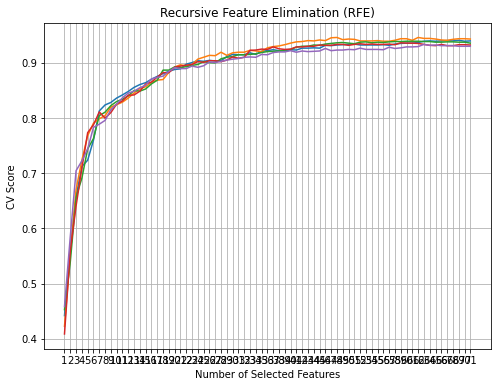

The optimal number of features: 63


In [28]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X_train.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [30]:
X_train.shape

(8788, 71)

In [31]:
XX = df.iloc[:, 0:71]

In [34]:
X_rfe = XX.iloc[:, rfecv.support_]
#print("\"X\" dimension: {}".format(X_train.shape))
#print("\"X\" column list:", df.iloc[:, 0:71].columns.tolist())
#print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X_rfe" column list: ['S2Sn1.Blue', 'S2Sn1.Green', 'S2Sn1.Red', 'S2Sn1.RE1', 'S2Sn1.RE2', 'S2Sn1.RE3', 'S2Sn1.NIR', 'S2Sn1.NNIR', 'S2Sn1.SWIR3', 'S2Sn1.SWIR4', 'S2Sn2.Blue', 'S2Sn2.Green', 'S2Sn2.Red', 'S2Sn2.RE1', 'S2Sn2.RE2', 'S2Sn2.RE3', 'S2Sn2.NIR', 'S2Sn2.NNIR', 'S2Sn2.SWIR3', 'S2Sn2.SWIR4', 'S2Sn3.Blue', 'S2Sn3.Green', 'S2Sn3.Red', 'S2Sn3.RE1', 'S2Sn3.RE2', 'S2Sn3.RE3', 'S2Sn3.NIR', 'S2Sn3.NNIR', 'S2Sn3.SWIR3', 'S2Sn3.SWIR4', 'S2Sn4.Blue', 'S2Sn4.Green', 'S2Sn4.Red', 'S2Sn4.RE2', 'S2Sn4.RE3', 'S2Sn4.NIR', 'S2Sn4.NNIR', 'S2Sn4.SWIR3', 'S2Sn4.SWIR4', 'EVI2', 'NDWI', 'MSAVI', 'SAVI', 'ARVI2', 'Onset_Value', 'Onset_Time', 'Max_Value', ' Offset_value', 'Offset_time', 'BeforeMaxT', 'AfterMaxT', 'GreenUpSlope', 'BrownDownSlope', 'TINDVI', 'TINDVIAfterMax', 'TINDVIAsymmetry', 'S1Sn1.VV', 'S1Sn1.VH', 'S1Sn2.VV', 'S1Sn2.VH', 'S1Sn3.VV', 'S1Sn3.VH', 'S1Sn4.VH']


In [35]:
len(X_rfe.columns.tolist())

63

['S2Sn1.Blue', 'S2Sn1.Green', 'S2Sn1.Red', 'S2Sn1.RE1', 'S2Sn1.RE2', 'S2Sn1.RE3', 'S2Sn1.NIR', 'S2Sn1.NNIR', 'S2Sn1.SWIR3', 'S2Sn1.SWIR4', 'S2Sn2.Blue', 'S2Sn2.Green', 'S2Sn2.Red', 'S2Sn2.RE1', 'S2Sn2.RE2', 'S2Sn2.RE3', 'S2Sn2.NIR', 'S2Sn2.NNIR', 'S2Sn2.SWIR3', 'S2Sn2.SWIR4', 'S2Sn3.Blue', 'S2Sn3.Green', 'S2Sn3.Red', 'S2Sn3.RE1', 'S2Sn3.RE2', 'S2Sn3.RE3', 'S2Sn3.NIR', 'S2Sn3.NNIR', 'S2Sn3.SWIR3', 'S2Sn3.SWIR4', 'S2Sn4.Blue', 'S2Sn4.Green', 'S2Sn4.Red', 'S2Sn4.RE2', 'S2Sn4.RE3', 'S2Sn4.NIR', 'S2Sn4.NNIR', 'S2Sn4.SWIR3', 'S2Sn4.SWIR4', 'EVI2', 'NDWI', 'MSAVI', 'SAVI', 'ARVI2', 'Onset_Value', 'Onset_Time', 'Max_Value', ' Offset_value', 'Offset_time', 'BeforeMaxT', 'AfterMaxT', 'GreenUpSlope', 'TINDVI', 'TINDVIAfterMax', 'TINDVIAsymmetry', 'S1Sn1.VV', 'S1Sn1.VH', 'S1Sn2.VV', 'S1Sn2.VH', 'S1Sn3.VV', 'S1Sn3.VH', 'S1Sn4.VH']

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, step=1, n_features_to_select=1)
selector = selector.fit(X, y)
selector.ranking_

In [ ]:
X.shape

### RFECV with DecisionTreeClassifier

In [ ]:
estimator = DecisionTreeClassifier(random_state=random_state)
rfecv = RFECV(estimator=estimator, min_features_to_select = 1, step=1, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring="accuracy")
rfecv.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X_train.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [ ]:
X_rfe = XX.iloc[:, rfecv.support_]
print("\"X\" dimension: {}".format(XX.shape))
print("\"X\" column list:", XX.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

['S2Sn1.Green', 'S2Sn1.Red', 'S2Sn1.RE1', 'S2Sn1.RE2', 'S2Sn1.SWIR4', 'S2Sn2.Green', 'S2Sn2.NNIR', 'S2Sn2.SWIR3', 'S2Sn2.SWIR4', 'S2Sn3.Blue', 'S2Sn3.RE1', 'S2Sn3.RE2', 'S2Sn3.NNIR', 'S2Sn3.SWIR3', 'S2Sn4.Blue', 'S2Sn4.RE1', 'S2Sn4.NNIR', 'S2Sn4.SWIR4', 'NDWI', 'SAVI', ' Offset_value', 'TINDVI', 'S1Sn1.VV', 'S1Sn1.VH', 'S1Sn3.VH']

### RFECV with RandomForestClassifier()

In [ ]:
estimator = RandomForestClassifier(random_state=random_state)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring="accuracy")
rfecv.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X_train.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [ ]:
X_rfe = XX.iloc[:, rfecv.support_]
print("\"X\" dimension: {}".format(XX.shape))
print("\"X\" column list:", XX.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

['S2Sn1.Blue', 'S2Sn1.Green', 'S2Sn1.Red', 'S2Sn1.RE1', 'S2Sn1.RE2', 'S2Sn1.RE3', 'S2Sn1.NNIR', 'S2Sn1.SWIR3', 'S2Sn1.SWIR4', 'S2Sn2.Green', 'S2Sn2.RE3', 'S2Sn2.NIR', 'S2Sn2.NNIR', 'S2Sn2.SWIR3', 'S2Sn2.SWIR4', 'S2Sn3.Blue', 'S2Sn3.Red', 'S2Sn3.RE1', 'S2Sn3.RE2', 'S2Sn3.NNIR', 'S2Sn3.SWIR3', 'S2Sn3.SWIR4', 'S2Sn4.Blue', 'S2Sn4.Green', 'S2Sn4.Red', 'S2Sn4.RE3', 'S2Sn4.NNIR', 'S2Sn4.SWIR3', 'S2Sn4.SWIR4', 'NDVI', 'EVI2', 'NDWI', 'MSAVI', 'SAVI', 'GNDVI', ' Offset_value', 'TINDVI', ' TINDVIBeforeMax', 'TINDVIAfterMax', 'S1Sn1.VV', 'S1Sn1.VH', 'S1Sn2.VH', 'S1Sn3.VV', 'S1Sn3.VH', 'S1Sn4.VV', 'S1Sn4.VH']